In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
import re
from collections import Counter
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [2]:
df = pd.read_csv('/Users/ksmith/Documents/Code/DS1/Unit4_Project/build-post-here-DS/plz_work.csv')
df = df.fillna('')
df['all_text'] = df['title'] + ' ' + df['text'] # Combining text & titles to one field

df.head(10)

,Unnamed: 0,submission_id,title,text,subreddit_id,name,all_text
0,0,bcy7ky,15 minutes wait to play more?,"So I dodged a game, all my mains banned or pic...",2rfxx,leagueoflegends,15 minutes wait to play more? So I dodged a ga...
1,1,bcy6mf,League has to investigate possible fake game b...,Obvious inting in game 5 right before TSM win ...,2rfxx,leagueoflegends,League has to investigate possible fake game b...
2,2,bcz8v5,"Xmithie...the Goat, I told you so",Here's what I said about Xmithie years ago...\...,2rfxx,leagueoflegends,"Xmithie...the Goat, I told you so Here's what ..."
3,3,bcz9r2,Whatever happened to that Teacher in Korea who...,Anyone remember this ? It was way back like 20...,2rfxx,leagueoflegends,Whatever happened to that Teacher in Korea who...
4,4,bcz9wj,Just got to diamond playing annie only :),Just wanted to share my excitement with you gu...,2rfxx,leagueoflegends,Just got to diamond playing annie only :) Just...
5,5,bcza0d,Hot Take: TSM vs TL is the Best Finals in LCS ...,"As a TSM fan it sucks to lose, but those games...",2rfxx,leagueoflegends,Hot Take: TSM vs TL is the Best Finals in LCS ...
6,6,bczb3x,Doublelift never meet Faker before in an offic...,"As the title, I just realized somehow Doubleli...",2rfxx,leagueoflegends,Doublelift never meet Faker before in an offic...
7,7,bczbqf,Griffin went balls to the walls to make LS loo...,after the whole LS Vs Reddit vs other casters ...,2rfxx,leagueoflegends,Griffin went balls to the walls to make LS loo...
8,8,bczbu3,Dodged ranked game due to client bug :),&#x200B;\r\r\n\r\r\nhttps://i.redd.it/fj8xph83...,2rfxx,leagueoflegends,Dodged ranked game due to client bug :) &#x200...
9,9,bczdhn,Decided to re-roll the skin shards I had saved...,https://imgur.com/Ezbocp6\r\r\n\r\r\nhttps://i...,2rfxx,leagueoflegends,Decided to re-roll the skin shards I had saved...


In [3]:
top_20 = ['AskReddit', 'dankmemes', 'memes', 'teenagers', 'aww', 'RocketLeagueExchange', 'Showerthoughts',
          'funny', 'me_irl', 'freefolk', 'gameofthrones', 'pics', 'NoStupidQuestions', 'AskOuija',
          'unpopularopinion', 'gaming', 'videos', 'politics', 'AmItheAsshole', 'Jokes']

data = df[df['name'].isin(top_20)]
data = data.drop(data.columns[0], axis=1) # Drop old row index
data.head()

,submission_id,title,text,subreddit_id,name,all_text
551,bcy7k8,[Spoilers] What is that one conspiracy theory ...,Arya is already dead and is actually Jaqen H'g...,2rjz2,gameofthrones,[Spoilers] What is that one conspiracy theory ...
552,bcz9cw,[SPOILERS] The only reunion that I want to see...,,2rjz2,gameofthrones,[SPOILERS] The only reunion that I want to see...
553,bczaow,[No Spoilers] How does rising the dead work?,Some stuff I wonder about.\r\r\n\r\r\nHow fres...,2rjz2,gameofthrones,[No Spoilers] How does rising the dead work? S...
554,bczgts,[No Spoilers] House Targaryen sigil cross stitch,,2rjz2,gameofthrones,[No Spoilers] House Targaryen sigil cross stitch
555,bczhln,[No Spoilers] Need help!!,My exams(very important) are going on and will...,2rjz2,gameofthrones,[No Spoilers] Need help!! My exams(very import...


In [4]:
import re
from urllib.parse import urlparse

def url_replace(string):
    return re.sub('http\S+|www.\S+', lambda match: urlparse(match.group()).hostname, string)

data['all_text'] = data['all_text'].apply(url_replace)

In [5]:
import string

table = str.maketrans(string.punctuation, ' '*len(string.punctuation))

data['all_text'] = data['all_text'].str.lower()  #Text is lowercase
data['all_text'] = data['all_text'].str.replace('\r','')
data['all_text'] = data['all_text'].str.replace('\n','')
data['all_text'] = data['all_text'].str.replace('/',' ')
data['all_text'] = data['all_text'].str.replace('  ',' ')
data['all_text'] = data['all_text'].str.replace('www','')
data['all_text'] = data['all_text'].str.replace('com',' ')
data['all_text'] = data['all_text'].str.translate(table) #Remove punctuation

In [6]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.33, random_state=42)

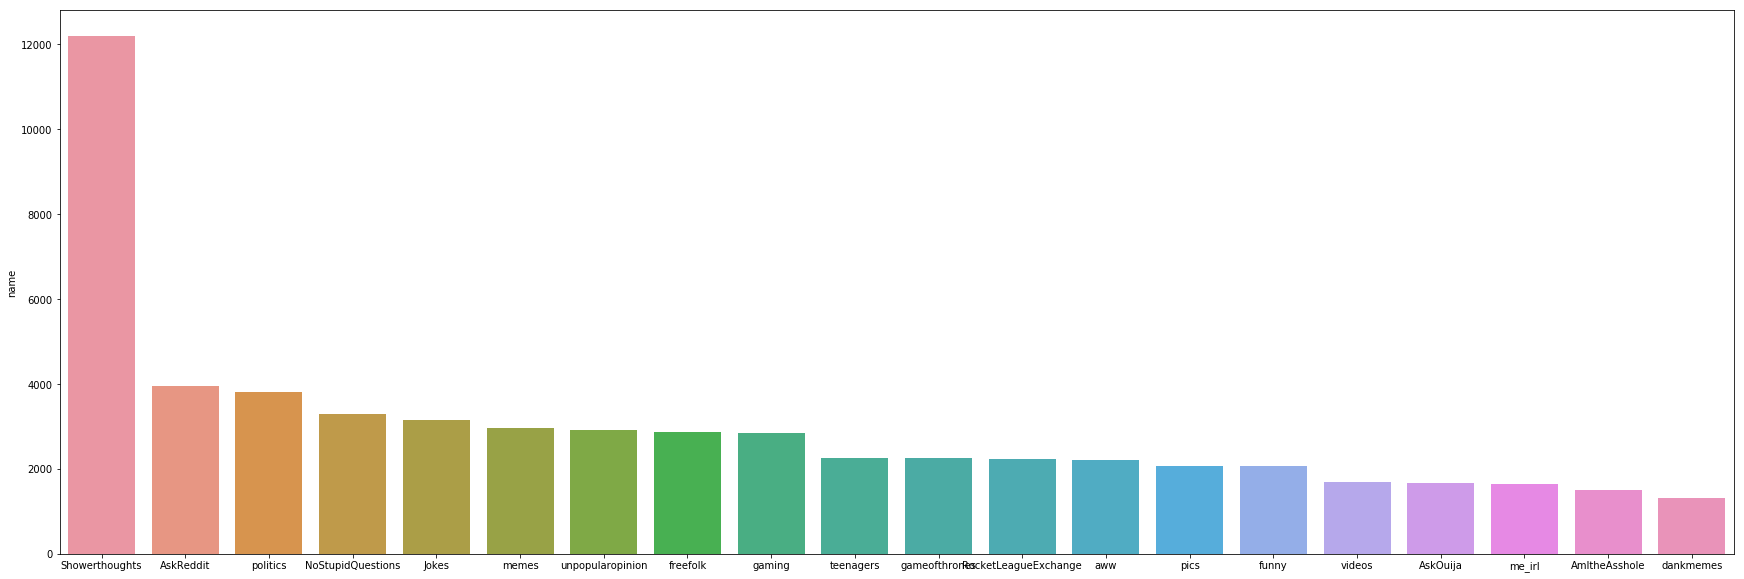

In [7]:
fig = plt.figure(figsize=(30,10))
sns.barplot(x = train['name'].unique(), y=train['name'].value_counts())
plt.show()

In [9]:
!pip install spacy

    100% |████████████████████████████████| 27.7MB 2.0MB/s eta 0:00:01
  Installing build dependencies ... done
  Using cached https://files.pythonhosted.org/packages/b9/bd/faace403086ee922afc74e5615cb8c21020fcf5d5667314e943c08f71fde/murmurhash-1.0.2-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d7/11/37da628920bf2999bd8c4ffc40908413622486d5dbc4e60d87a58c428367/cymem-2.0.2-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/48/fe/2f2e8c91541785f2abe0d51f37eb00356513b9ff3d24fb27fd5b59e18264/preshed-2.0.1-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
    100% |████████████████████████████████| 2.8MB 13.0MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/36/41/9e934e2b8a2cdae447ed1

In [22]:
!python -m spacy download en_core_web_sm

You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [27]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

punctuations = string.punctuation
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

st_text = [text for text in train[train['name'] == 'Showerthoughts']['all_text']]
ask_text = [text for text in train[train['name'] == 'AskReddit']['all_text']]
st_clean = cleanup_text(st_text)
st_clean = ' '.join(st_clean).split()
ask_clean = cleanup_text(ask_text)
ask_clean = ' '.join(ask_clean).split()
st_counts = Counter(st_clean)
ask_counts = Counter(ask_clean)

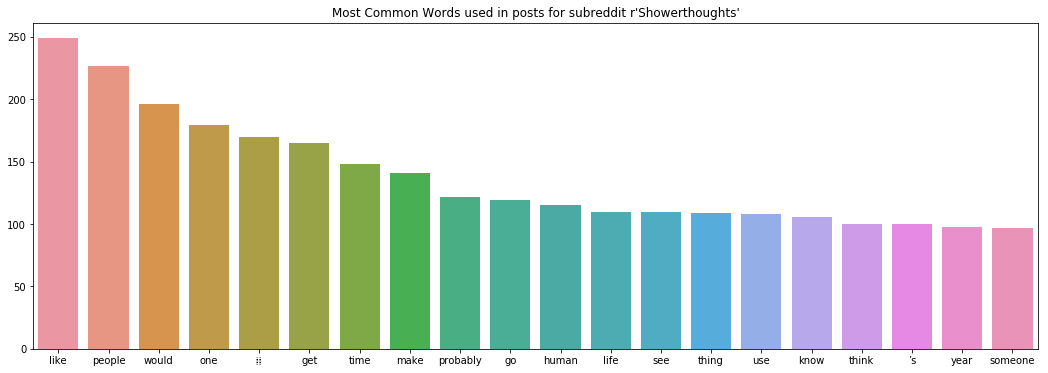

In [28]:
st_common_words = [word[0] for word in st_counts.most_common(20)]
st_common_counts = [word[1] for word in st_counts.most_common(20)]
fig = plt.figure(figsize=(18,6))
sns.barplot(x=st_common_words, y=st_common_counts)
plt.title("Most Common Words used in posts for subreddit r'Showerthoughts'")
plt.show()

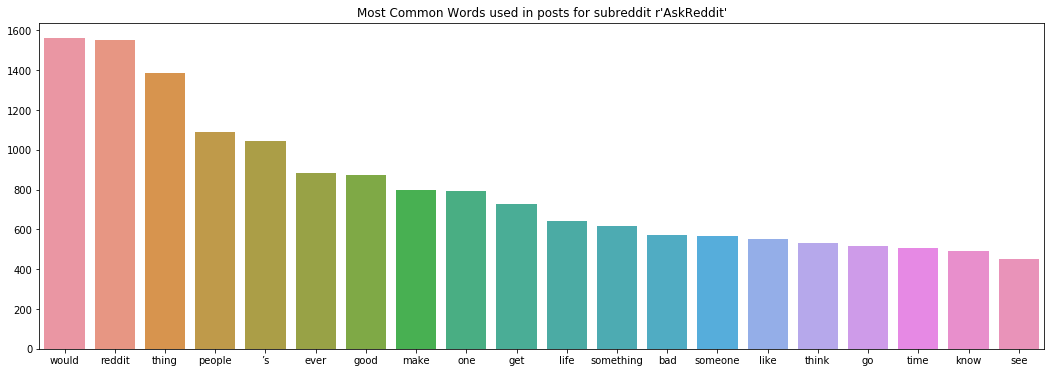

In [29]:
ask_common_words = [word[0] for word in ask_counts.most_common(20)]
ask_common_counts = [word[1] for word in ask_counts.most_common(20)]
fig = plt.figure(figsize=(18,6))
sns.barplot(x=ask_common_words, y=ask_common_counts)
plt.title("Most Common Words used in posts for subreddit r'AskReddit'")
plt.show()

In [31]:
!python -m spacy download en

You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/anaconda3/lib/python3.7/site-packages/en_core_web_sm -->
/usr/local/anaconda3/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
import string
import re
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()

In [33]:
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”"]
class CleanTextTransformer(TransformerMixin):
   def transform(self, X, **transform_params):
        return [cleanText(text) for text in X]
   def fit(self, X, y=None, **fit_params):
        return self
def get_params(self, deep=True):
        return {}
    
def cleanText(text):
    text = text.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    return text
def tokenizeText(sample):
    tokens = parser(sample)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens

In [48]:
def printNMostInformative(vectorizer, clf, N):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    topClass1 = coefs_with_fns[:N]
    topClass2 = coefs_with_fns[:-(N + 1):-1]
    print("Class 1 best: ")
    for feat in topClass1:
        print(feat)
    print("Class 2 best: ")
    for feat in topClass2:
        print(feat)
vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
svm = LinearSVC()
clf = CalibratedClassifierCV(svm) 

pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('clf', clf)])
# data
train1 = train['all_text'].tolist()
labelsTrain1 = train['name'].tolist()
test1 = test['all_text'].tolist()
labelsTest1 = test['name'].tolist()
# train
pipe.fit(train1, labelsTrain1)
# test
preds = pipe.predict(test1)
print("accuracy:", accuracy_score(labelsTest1, preds))
# print("Top 10 features used to predict: ")

# printNMostInformative(vectorizer, clf, 10)
# pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer)])
# transform = pipe.fit_transform(train1, labelsTrain1)
# vocab = vectorizer.get_feature_names()
# for i in range(len(train1)):
#     s = ""
#     indexIntoVocab = transform.indices[transform.indptr[i]:transform.indptr[i+1]]
#     numOccurences = transform.data[transform.indptr[i]:transform.indptr[i+1]]
#     for idx, num in zip(indexIntoVocab, numOccurences):
#         s += str((vocab[idx], num))

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/calibration.py:447: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/calibration.py:447: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/calibration.py:447: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/calibration.py:447: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/calibration.py:447: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/calibration.py:447: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
/usr

accuracy: 0.5442711023866101


In [49]:
from sklearn import metrics
print(metrics.classification_report(labelsTest1, preds, 
                                    target_names=data['name'].unique()))

                      precision    recall  f1-score   support

       gameofthrones       0.96      0.94      0.95       822
           teenagers       0.36      0.09      0.15       788
           AskReddit       0.38      0.95      0.55      6090
                pics       0.66      0.43      0.52      1581
           dankmemes       0.54      0.38      0.45      1940
RocketLeagueExchange       0.99      0.99      0.99      1113
                 aww       0.33      0.08      0.13      1006
              me_irl       0.67      0.39      0.49      1463
               funny       0.36      0.04      0.08       780
      Showerthoughts       0.75      0.34      0.47      1061
               memes       0.33      0.10      0.16      1580
    unpopularopinion       0.82      0.82      0.82      1025
       AmItheAsshole       0.65      0.37      0.47      1410
              videos       0.99      0.97      0.98      1054
            freefolk       0.16      0.04      0.06       718
       

In [50]:
input_title = "no spoilers  how does rising the dead work"
input_text = "some stuff i wonder about how fresh do the dead need to be  can the nk rise people ho died weeks months years ago and how close"
all_input = [input_title + ' ' + input_text]

all_input


['no spoilers  how does rising the dead work some stuff i wonder about how fresh do the dead need to be  can the nk rise people ho died weeks months years ago and how close']

In [51]:
pipe.predict(all_input)

array(['gameofthrones'], dtype='<U20')

In [52]:
output = pd.DataFrame(pipe.predict_proba(all_input), columns=pipe.classes_).T.nlargest(5, [0]).reset_index().values
print(output)

[['gameofthrones' 0.3742625703561772]
 ['NoStupidQuestions' 0.1344190498366993]
 ['AskReddit' 0.12857043539264698]
 ['teenagers' 0.12159356414331896]
 ['Showerthoughts' 0.06325879998386587]]
